<a href="https://colab.research.google.com/github/rfechner/DataLiteracy2022/blob/main/assignments/Exercise02/Exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data literacy exercise 02
 
Machine Learning in Science, University of Tübingen, Winter Semester 2022

## Theoretical Part

### EXAMple Question

A tournament has $N$ levels and $2^N$ players with skills $S_1 > S_2 > ... > S_{2^N}$ . At each level,
random pairs are formed and the winner proceeds to the next level. The player with higher
skills always wins.

(a) What is the probability that the two most skilled players 1 and 2 do not meet at the first
level?

(b) What is the probability that the two most skilled players 1 and 2 will meet in the final
level?

(Bonus: can you compute this probability without using the result from part (a)?)

### Solution

(a) The probability of the two best players not meeting is 1 minus the probability for them to meet. Suppose that player1 is fixed in their position in the bracket. There are now $2^{N} - 1$ possible candidate players to end up in the same group. Thus, the probability of player2 ending up as player1's opponent is $\frac{1}{2^N - 1}$.

From this follows that the probability of the top two players not meeting in the first layer is $1 - \frac{1}{2^N - 1}$.

(b) To meet in the final level, the two players must have missed each other in the $N-1$ levels before that. From our solution of (a) we know that the probability of them not meeting at level $N$ is $1 - \frac{1}{2^N - 1}$. As the players are "shuffled" at each level, we can assume that the probability for them meeting at the top level is equal to the product of the probabilities of them not meeting each other beforehand.

$$\prod_{i=2}^N \left(1 - \frac{1}{2^i - 1}\right)$$

### Theory Question

Information and entropy are fundamental concepts in probability, and are ubiquitous in statis-
tical analysis. In this question we aim to provide you with an intuitive understanding of these
quantities.

Consider a fair coin $C_f$ and a bent coin $C_b$. $C_f$ has an equal probability of $heads(H)$ and $tails(T)$
when tossed, $p(C_f = H) = 0.5$. $C_b$ is biased, with $p(C_b = H) = 0.99$.

The information present in a random event $x$ can be defined as a function of the probability of
occurence of that event:

$$I(x) = log_2( \frac{1}{p(x)})
= − log_2(p(x)).$$

(Intuitively, information is the ability to distinguish possibilities. To distinguish $2^k$ possibilities
you need $k$ bits of information, hence the log form.)

(a) Show that for a set of independently occurring events $x = (x1, x2), I(x) = I(x1) + I(x2)$.
For each of the coins $C_f$ and $C_b$, compute the information contained in all possible events
when the coin is tossed twice. Interpret these values with the intuition provided above.
The *entropy* of a random variable $X$ with probability distribution $p_X$ is the expected information over all possible realizations of $X$:
$$H(X) = \mathbb E_{p_X} [I(x)].$$
(In the same way as information, entropy can be interpreted as the average number of bits
needed to communicate each event of a random variable.)

(b) For each of the two coins $C_f$ and $C_b$, compute the entropy for a single toss of the coin.
What is the trend of entropy vs information for different probabilities of heads for a coin?
Use the above interpretation to justify your observation.

### Solution

(a) Assume that (1) $x_1,x_2$ are i.i.d.


\begin{align*}
  I(\mathbf{x}) &= I(p(x_1,x_2))\\
  &= -log_2(p(x_1, x_2))\\
  &\stackrel{(1)}{=} -log_2(p(x_1) \cdot p(x_2))\\
  &= -log_2(p(x_1)) -log_2(p(x_2))\\
  &= I(x_1) + I(x_2)
\end{align*}


(1) $C_f$

\begin{align*}
  I(C_f = H, C_f = H) &= I(C_f = H) + I(C_f = H)&\\
  &= -2log_2(p(C_f = H))&\\
  &= 2&\\
  I(C_f = H, C_f = T) &= I(C_f = H) + I(C_f = T)&\\
  &= -log_2(p(C_f = H)) - log_2(p(C_f = T))&\\
  &= 2&\\
  I(C_f = T, C_f = H) &= I(C_f = T) + I(C_f = H)&\\
  &= 2&\\
  I(C_f = T, C_f = T) &= I(C_f = T) + I(C_f = T)&\\
  &= -2log_2(p(C_f = T))&\\
  &= 2&
\end{align*}

(2) $C_b$

\begin{align*}
  I(C_b = H, C_b = H) &= I(C_b = H) + I(C_b = H)&\\
  &= -2log_2(p(C_b = H))&\\
  &\approx 0.029&\\
  I(C_b = H, C_b = T) &= I(C_b = H) + I(C_b = T)&\\
  &= -log_2(p(C_b = H)) - log_2(p(C_b = T))&\\
  &\approx 6.657&\\
  I(C_b = T, C_b = H) &= I(C_b = T) + I(C_b = H)&\\
  &\approx 6.657&\\
  I(C_b = T, C_b = T) &= I(C_b = T) + I(C_b = T)&\\
  &= -2log_2(p(T))&\\
  &\approx 13.287&
\end{align*}


(b)

(1) $C_f$

Assume that $X = \{H,T\}$

With
$$\mathbb E_{p_X}[I(x)] = \sum_{x_i \in X}\left( p(x_i)\cdot I(X = x_i)\right)$$
we have 

\begin{align*}
  \mathbb E_{p_{C_f}}[I(x)] &= p(C_f = H) \cdot I(C_f = H) + p(C_f = T) \cdot I(C_f = T)\\
  &= 0.5 \cdot 1 + 0.5 \cdot 1\\
  &= 1
\end{align*}

(2) $C_b$

\begin{align*}
  \mathbb E_{p_{C_b}}[I(x)] &= p(C_b = H) \cdot I(C_b = H) + p(C_b = T) \cdot I(C_b = T)\\
  &\approx 0.99 \cdot 0.0145 + 0.01 \cdot 6.643\\
  &\approx 0.081
\end{align*}

The entropy does seem to be inversely related to the information of a random variable. As $C_f$ is fair, the outcome of the cointoss is maximally random. Thus, the entropy is maximized. For the baised coin $C_b$ we have a bias on the outcome of the cointoss, hence the entropy is very small.


### Introduction

In this notebook you learn to apply the concepts of *entropy* and *information* to create a bot that can play [Wordle](https://www.nytimes.com/games/wordle/index.html).

Wordle is a word game created by Josh Wardle and published by The New York Times. In the game, you have six attempts to guess the five-letter daily word. During each attempt you have to propose a valid five-letter word. After proposing a word you will receive feedback in the form of a pattern of colored tiles. Green indicates a matching letter, yellow indicates a match - but in the wrong spot, and grey indicates that the guessed letter is not in the daily word. For example:

you guessed: TABOO

⬛⬛🟩⬛⬛

B is in the daily word and in the correct spot.


You guessed: QUACK

⬛🟨⬛⬛⬛

U is in the daily word but in a different spot.

You might want to play a game before starting this exercise!

**Some further notes before starting:**

We already included some useful functions for you in the *utils.py* file. These functions will be explained throughout the notebook, so don't worry if they are not clear at this point! Make sure the file is in the same location as this notebook.

This exercise is inspired by [3Blue1Brown's video](https://youtu.be/v68zYyaEmEA). Feel free to watch if you are interested, but the exercise should be doable without it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import os

### Loading the data

We included a dataset as the *wordle_reduced_dataset.txt* file. This contains a subset of the words used in the actual game, so that your code runs quickly. **Your first objective is to load this dataset** and create a *list*, where each entry is one of the words in the dataset (as a *string*).

In [2]:
file = "wordle_reduced_dataset.txt"

def load_data(file):
    """
    Loads a .txt file to a list
    """
    word_list = []
    # your code here
    with open(file, 'r') as f:
        
        for line in f:
            word_list.append(line[:-1])
    
    return word_list

word_list = load_data(file)

In [3]:
word_list[0:5]

['aback', 'acrid', 'afoot', 'alarm', 'alone']

### What is the initial entropy?

We learned in the theory exercise of this week that the definition of entropy $H(X)$ for a discrete random variable $X$ is the expected amount of information content: $\mathbb{E}[I(X)]$. Here, the information content $I(X)$ is defined as : $I(X) = \log_2\left(\frac{1}{p(X)}\right)$.

**Calculate the initial entropy when using this dataset**. You can assume each word in the dataset to be equaly likely to be the daily word.

In [4]:
information = -np.log2(len(word_list))
entropy_word_list = [information for _ in word_list]

### Reducing the entropy
Our wordle bot will try to make guesses that reduce the entropy as much as possible. We will do this by calculating the expected information gain for each possible word in our dataset and subsequently pick the best candidate word.


When we propose a 5 letter word in the wordle game, we receive a pattern (e.g.: ⬛🟩⬛🟩⬛, or ⬛🟨🟩⬛⬛). 

**How many possible patterns are there?**

In [5]:
n_patterns = 3**5

We will associate each pattern with an index ranging from *0* to *n_patterns-1*. If you want to know what the pattern for a given index looks like you can call the *patterns_to_string* function()

In [6]:
pattern_index = 30
print(patterns_to_string([pattern_index, 21, 234]))

⬛🟨⬛🟨⬛
⬛🟨🟩⬛⬛
⬛⬛🟩🟩🟩


After proposing a word and receiving a pattern of colored tiles, we can reduce the size of our dataset - we can simply discard all the words that are not consistent with this pattern / word combination! 

However we do not know what pattern we receive before proposing a word. What we can however calculate, is the probability of receiving each possible pattern (given that we have a list of possible words). We can then use this to calculate the expected information (entropy) gain for the proposed word.

We included the function *get_pattern_distributions()* that given a (list of) proposed word(s) and a list all the possible words, returns how often each pattern occurs. We included an example call using the word 'ethic'

**Assume our proposed word is 'ethic'. Create a bar plot with the x axis as the pattern indices and the y axis as the number of occurrences of each pattern. Do you see any structure? Explain why this arises.**

Text(0, 0.5, 'occurences')

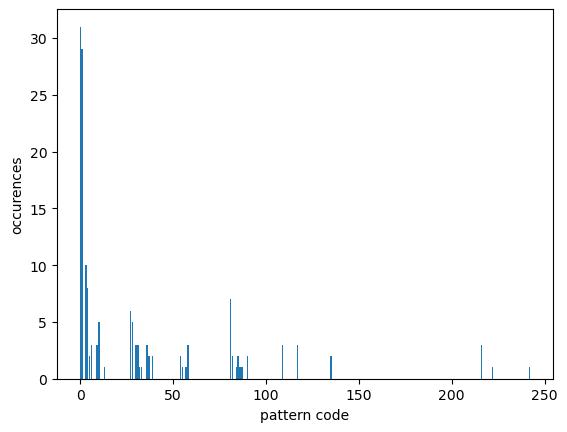

In [7]:
pattern_dist_ethic = get_pattern_distributions(['ethic'], word_list)[0]
plt.bar(x=range(n_patterns), height=pattern_dist_ethic)
plt.xlabel('pattern code')
plt.ylabel('occurences')

**Use the pattern distribution above to calculate the expected information gain for the word 'ethic'.** Note that there are quite some patterns that occur with zero probability. To handle numerical errors in the computation of entropy, assume that $-p(x)\log(p(x)) = 0$ when $p(x) = 0$.

In [8]:
from scipy.stats import entropy as H

def entropy(patterns_dist):
    
    distribution = patterns_dist / sum(patterns_dist)
    
    return H(distribution, base=2)

entropy_ethic = entropy(pattern_dist_ethic)
entropy_ethic

4.2222713240933345

In [ ]:
x = np.linspace(0, 1, 100)
ys = [entropy(np.array([p, 1-p]) for p in x

### Creating the wordle bot

Now we are ready to create a bot that can play wordle! **Complete the best_pick() function**. Your bot can call any of the functions we previously used.

In [15]:
class Wordle_bot():
    
    def __init__(self, word_list):
        """
        Initialize a Wordle bot
        
        Args:
            word_list: list of words that can be used in the wordle game
        """
        
        # stores all words in our dataset
        self.initial_word_list = word_list.copy()
        
        # keeps track of all currently allowed words
        # this list should get shorter as the game progresses
        self.allowed_word_list = word_list.copy() 
    
    def reset(self):
        """
        Resets the bot, all words in the dataset are possible again
        """
        
        self.allowed_word_list = self.initial_word_list.copy()
    
    def initialize_for_next_round(self, allowed_word_list):
        """
        Sets the allowed word list, use after making a guess
        
        Args:
            allowed_word_list: list of words that are still possible answers
        """
        
        self.allowed_word_list = allowed_word_list.copy()
        
        
    def best_pick(self):
        """
        Picks the word with the highest expected information gain.
        
        Returns:
            best_word: string, word with highest expected information
            
        """
        
        # 1) loop over words in self.allowed_word_list
        # 2) keep track of entropies for every word
        # 3) select word with maximal entropy
        
        max_entropy_word = np.argmax([entropy(get_pattern_distributions([word], self.allowed_word_list)[0])\
                                      for word in self.allowed_word_list])
        
        
        return self.allowed_word_list[max_entropy_word]

**Initialize a bot and find out what is the best word to start a game with** (for this dataset)

In [19]:
bot = Wordle_bot(word_list)

bot.best_pick()

'raise'

In [26]:
word_list.index('raise')

102

### Play a single round

**Complete the code below to allow your bot to play a single round of the game** 

In [31]:
bot.reset() # reset the bot before playing a round
answer = word_list[np.random.randint(len(word_list))] # choose random word

round_n=1
guesses=[]
score=0
possibility_counts=[]
patterns = []
guess = None

while guess != answer and round_n <6:
    guess = bot.best_pick()
    pattern = get_pattern(guess, answer)
    possibilities = get_possible_words(guess, pattern, bot.allowed_word_list)
    bot.initialize_for_next_round(possibilities)

    patterns.append(pattern)
    guesses.append(guess)    
    possibility_counts.append(len(possibilities))
    score += 1
    round_n+=1

print("\n".join([
    "",
    f"Score: {score}",
    f"Answer: {answer}",
    f"Guesses: {guesses}",
    f"Reductions: {possibility_counts}",
    *patterns_to_string((*patterns, 3**5 - 1)).split("\n"),
    *" " * (6 - len(patterns)),
    *" " * 2,
]))



Score: 1
Answer: raise
Guesses: ['raise']
Reductions: [1]
🟩🟩🟩🟩🟩
🟩🟩🟩🟩🟩
 
 
 
 
 
 
 


### Play all the rounds

Once you are confident the bot is working properly, you can use it to play through all possible rounds. **How many attempts does it need to get the right word, on average?** 


In [32]:
final_result=simulate_games(bot, word_list,quiet=True)

In [34]:
# your code here
average_tries = final_result['average_score']